In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("NBA_TRAIN.csv")
df_test = pd.read_csv("NBA_TEST.csv")

In [4]:
df.head()

,self previous shot,player position,home game,location x,opponent previous shot,home team,shot type,points,away team,location y,time,date,shoot player,time from last shot,quarter,current shot outcome
0,MISSED,PF,No,676.0,MISSED,NOP,Jump Shot,2,CHI,225.0,10:48,2017-04-02,Bobby Portis,9.0,1,SCORED
1,MISSED,PG,Yes,59.0,SCORED,LAL,Layup,2,DAL,230.0,1:50,2016-12-29,D'Angelo Russell,45.0,1,MISSED
2,SCORED,C,No,50.0,SCORED,BRO,Layup,2,CHA,269.0,4:06,2016-11-04,Cody Zeller,46.0,3,SCORED
3,SCORED,SG,No,194.0,MISSED,LAL,Pullup Jump Shot,2,POR,357.0,0:13,2017-01-10,Allen Crabbe,NaN,4,SCORED
4,SCORED,PF,No,35.0,SCORED,MEM,Jump Shot,2,NYK,449.0,11:38,2017-04-07,Kyle O'Quinn,27.0,3,MISSED


In [5]:
df.describe()

,location x,points,location y,time from last shot,quarter
count,104834.000000,105036.000000,104834.000000,100068.000000,105036.000000
mean,468.636568,2.315949,249.394462,33.235300,2.482815
std,345.224986,0.464895,111.120327,19.804537,1.137619
min,0.000000,2.000000,0.000000,0.000000,1.000000
25%,94.000000,2.000000,197.000000,22.000000,1.000000
50%,342.000000,2.000000,250.000000,31.000000,2.000000
75%,843.000000,3.000000,302.000000,41.000000,3.000000
max,933.000000,3.000000,500.000000,228.000000,8.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105036 entries, 0 to 105035
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   self previous shot      103835 non-null  object 
 1   player position         105036 non-null  object 
 2   home game               105036 non-null  object 
 3   location x              104834 non-null  float64
 4   opponent previous shot  104260 non-null  object 
 5   home team               105036 non-null  object 
 6   shot type               105036 non-null  object 
 7   points                  105036 non-null  int64  
 8   away team               105036 non-null  object 
 9   location y              104834 non-null  float64
 10  time                    105036 non-null  object 
 11  date                    105036 non-null  object 
 12  shoot player            105036 non-null  object 
 13  time from last shot     100068 non-null  float64
 14  quarter             

# 1. EDA

# 1-1. 데이터 분포확인

<AxesSubplot:>

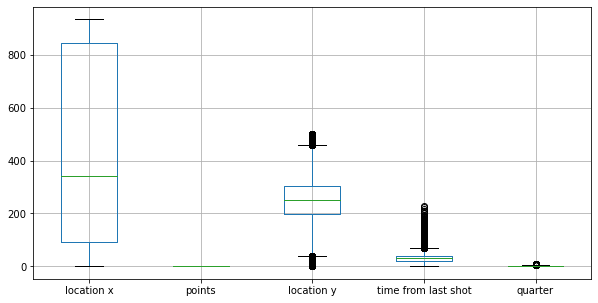

In [10]:
plt.figure(figsize=(10,5))
df.boxplot()

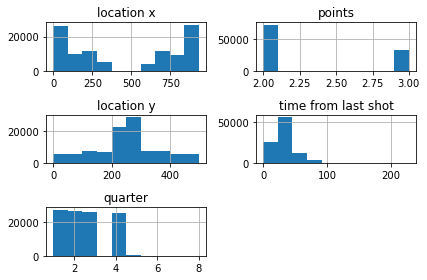

In [27]:
df.hist()
plt.tight_layout()

current shot outcome
MISSED    [[AxesSubplot(0.125,0.551739;0.125x0.328261), ...
SCORED    [[AxesSubplot(0.125,0.551739;0.125x0.328261), ...
dtype: object

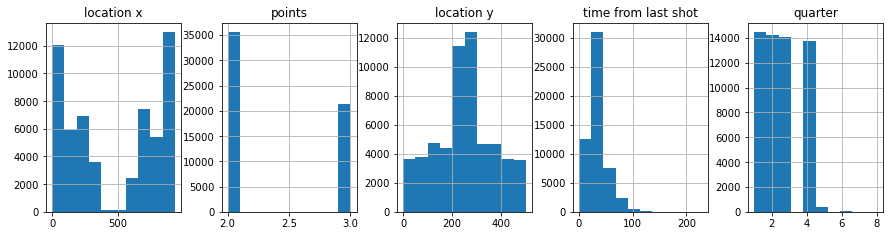

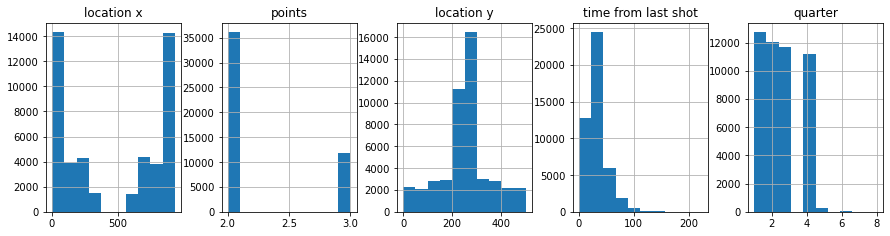

In [39]:

df.groupby('current shot outcome').hist(figsize=(15,8),layout=(2, 5))


array([[<AxesSubplot:xlabel='location x', ylabel='location x'>,
        <AxesSubplot:xlabel='points', ylabel='location x'>,
        <AxesSubplot:xlabel='location y', ylabel='location x'>,
        <AxesSubplot:xlabel='time from last shot', ylabel='location x'>,
        <AxesSubplot:xlabel='quarter', ylabel='location x'>],
       [<AxesSubplot:xlabel='location x', ylabel='points'>,
        <AxesSubplot:xlabel='points', ylabel='points'>,
        <AxesSubplot:xlabel='location y', ylabel='points'>,
        <AxesSubplot:xlabel='time from last shot', ylabel='points'>,
        <AxesSubplot:xlabel='quarter', ylabel='points'>],
       [<AxesSubplot:xlabel='location x', ylabel='location y'>,
        <AxesSubplot:xlabel='points', ylabel='location y'>,
        <AxesSubplot:xlabel='location y', ylabel='location y'>,
        <AxesSubplot:xlabel='time from last shot', ylabel='location y'>,
        <AxesSubplot:xlabel='quarter', ylabel='location y'>],
       [<AxesSubplot:xlabel='location x', ylabel='t

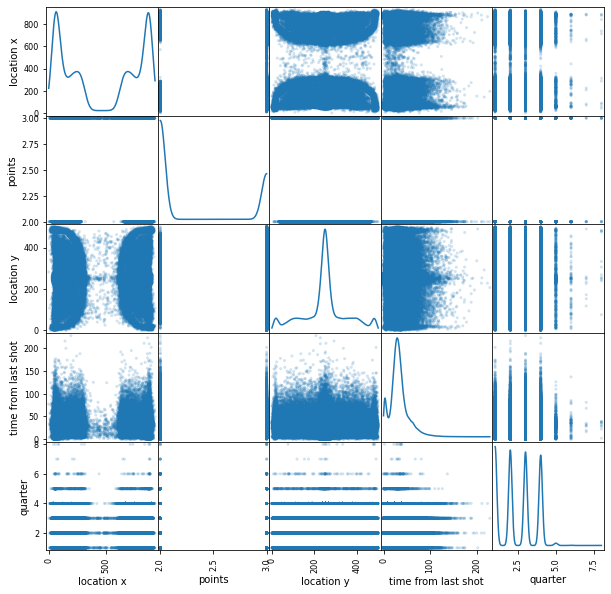

In [42]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')

<AxesSubplot:xlabel='date'>

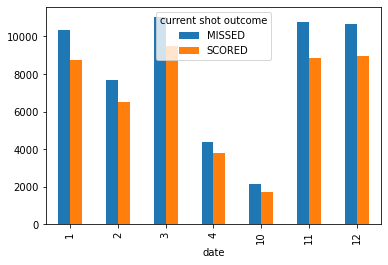

In [52]:
df["date"] = df["date"].astype("datetime64")
df.groupby([df["date"].dt.month, "current shot outcome"]).count()["points"].unstack(level=-1).plot(kind="bar")


<AxesSubplot:xlabel='date'>

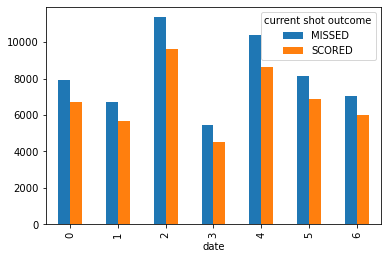

In [62]:
df.groupby([df["date"].dt.dayofweek, "current shot outcome"]).count()["points"].unstack().plot(kind="bar")

<AxesSubplot:xlabel='home game'>

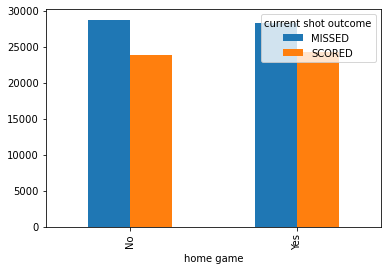

In [63]:
df.groupby(["home game", "current shot outcome"]).count()["points"].unstack(level=-1).plot(kind="bar")

<AxesSubplot:xlabel='player position'>

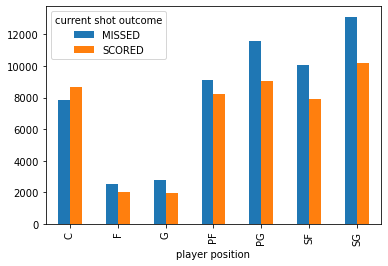

In [64]:
df.groupby(["player position", "current shot outcome"]).count()["points"].unstack(level=-1).plot(kind="bar")

<AxesSubplot:xlabel='opponent previous shot'>

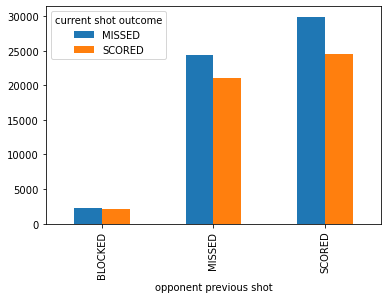

In [66]:
df.groupby(["opponent previous shot", "current shot outcome"]).count()["points"].unstack(level=-1).plot(kind="bar")

<AxesSubplot:xlabel='self previous shot'>

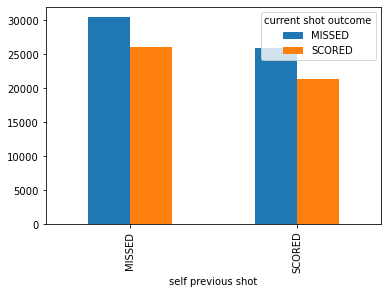

In [67]:
df.groupby(["self previous shot", "current shot outcome"]).count()["points"].unstack(level=-1).plot(kind="bar")

<AxesSubplot:xlabel='shot type'>

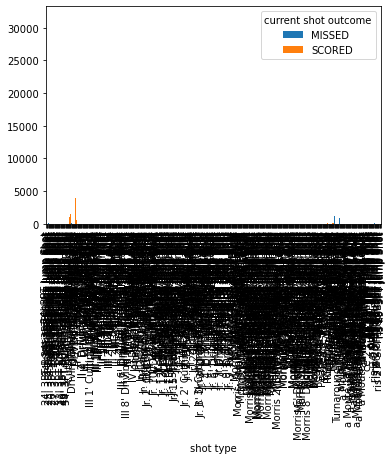

In [58]:
df.groupby(['shot type', "current shot outcome"]).count()["points"].unstack(level=-1).plot(kind="bar")

In [68]:
df['shot type'].value_counts()

Jump Shot                                47020
Layup                                     7939
Pullup Jump Shot                          7369
Driving Layup                             6682
Floating Jump Shot                        2274
                                         ...  
III 1' Cutting Finger Roll Layup Shot        1
III 1' Finger Roll Layup                     1
ris 29' 3PT Jump Shot                        1
Jr. 14' Turnaround Jump Shot                 1
Jr. 1' Finger Roll Layup                     1
Name: shot type, Length: 611, dtype: int64

In [71]:
df['shoot player'].value_counts()

Russell Westbrook    970
Andrew Wiggins       789
DeMar DeRozan        768
Anthony Davis        755
James Harden         742
                    ... 
Mike Tobey             1
Brice Johnson          1
Jarnell Stokes         1
Larry Sanders          1
Aaron Harrison         1
Name: shoot player, Length: 482, dtype: int64

In [72]:
df['home team'].value_counts()

NOP    3685
HOU    3665
NYK    3627
DET    3625
BRO    3619
GSW    3610
DEN    3599
PHX    3569
OKL    3550
CLE    3549
CHI    3541
BOS    3541
ATL    3539
PHI    3534
ORL    3528
LAL    3525
CHA    3500
IND    3487
TOR    3471
POR    3451
WAS    3443
LAC    3429
SAS    3409
MIA    3405
SAC    3396
DAL    3382
MIN    3381
UTA    3344
MIL    3328
MEM    3304
Name: home team, dtype: int64